In [35]:
# auto reload packages
%load_ext autoreload
%autoreload 2
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import local packages
import toroidal_physics as tp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
aspect_ratio = 0.5 # r_minor / r_major

/var/folders/38/2bzdl5412qz7lzzz021kxyf80000gp/T/ipykernel_374/1978934306.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 7


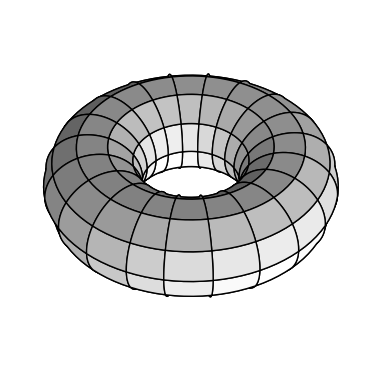

In [37]:

n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 1, aspect_ratio
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-1,1)
ax1.plot_surface(x, y, z, rstride=5, cstride=10, color='w', edgecolors='k')
ax1.view_init(40,10)
# hide axis
ax1.set_axis_off()
# aspect ratio
ax1.set_aspect('equal')
# zoom in
ax1.dist = 7


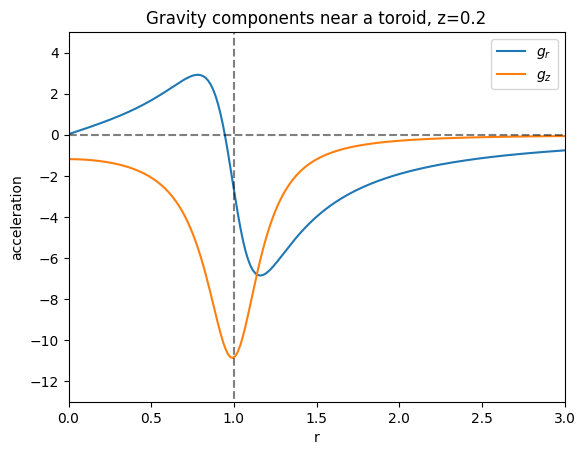

In [38]:
r_major = 1

r = np.linspace(0, 3, 200)
z = 0.2
a_r, a_z = tp.toroidal_gravity(r, z, r_major)

plt.plot(r, a_r, label="$g_r$")
plt.plot(r, a_z, label="$g_z$")
# y=0 line
plt.plot(r, np.zeros(len(r)), 'k--', alpha=0.5)

# x=1 line
plt.plot(np.ones(100), np.linspace(-15,15,100), 'k--', alpha=0.5)

plt.xlim(np.min(r), np.max(r))
plt.ylim(-13,5)

# plt.plot(r, a_theta, label="a_theta")
# plt.plot(r, a_simple, label="a_simple")
# plt.ylim(-10,10)
plt.xlabel("r")
plt.ylabel("acceleration")
plt.title("Gravity components near a toroid, z="+str(z))

plt.legend()
plt.savefig("gravity_near_toroid.png", dpi=300)

In [39]:
r_major = 6_378e3/(1+aspect_ratio) # m (radius of the earth)
r_minor = aspect_ratio*r_major
g_0 = 9.81 # m/s^2 (gravitational acceleration at the equator)
omega = 2*np.pi / 24 / 3600 # 1 rotation per day

In [40]:
phi = np.linspace(0, 2 * np.pi, 100)

r, z = tp.toroidal2cylindrical(phi, r_major, r_minor)

g_r, g_z = tp.toroidal_gravity(r, z, r_major)
g_r, g_z = tp.scale_gravity(g_r, g_z, phi, g_0)

centrifugal_r = tp.centrifugal_acceleration(r, omega)

1d: 0.0


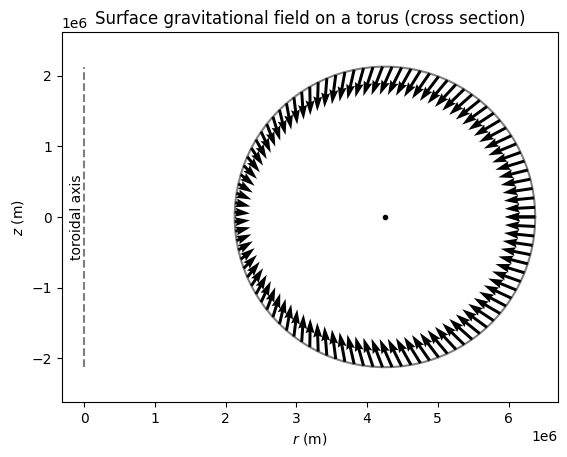

In [41]:
plt.plot(r,z,'k-', alpha=0.5)
plt.plot(r_major,0,'k.')
plt.plot([0,0],[-r_minor,r_minor],'k--', alpha=0.5)
plt.quiver(r,z,g_r,g_z)
# plt.quiver(r,z,centrifugal_r,0)
plt.axis('equal')
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'$z$ (m)')
plt.title('Surface gravitational field on a torus (cross section)')
plt.text(-0.02,0,'toroidal axis', ha='right', va='center', 
rotation=90)
# plt.xlim((-0.15,1.6))

# add quiver scaling
# plt.quiver(0.2,-0.4,0.1,0)
# plt.text(0.2,-0.42,'0.1 m/s$^2$', ha='left', va='top',
# rotation=0)

plt.savefig('toroidal_gravity.png', dpi=300, bbox_inches='tight')


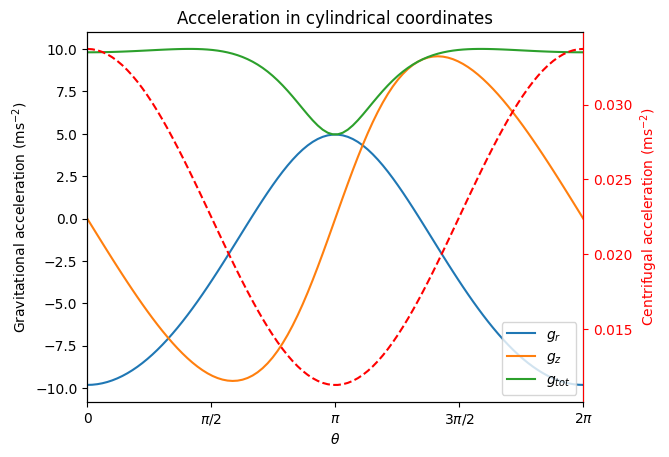

In [42]:
plt.plot(phi, g_r, label="$g_r$")
plt.plot(phi, g_z, label="$g_z$")
plt.plot(phi, np.sqrt(np.square(g_r) + np.square(g_z)), label="$g_{tot}$")
plt.ylabel("Gravitational acceleration (ms$^{-2}$)")
# legend in the bottom right
plt.legend(loc="lower right")
plt.xlabel(r"$\theta$")
# x axis is in radians
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)

# second y axis
plt.twinx()
# make red
plt.gca().spines['right'].set_color('red')
# make red axis label
plt.gca().yaxis.label.set_color('red')
# ticks too
plt.gca().tick_params(axis='y', colors='red')

# centrifugal acceleration on the second y axis
plt.plot(phi, centrifugal_r, label="$a_{c,r}$", color="r", linestyle="--")
plt.ylabel("Centrifugal acceleration (ms$^{-2}$)")
plt.title('Acceleration in cylindrical coordinates')
plt.savefig("surface_acceleration_cylindrical.png", dpi=300, bbox_inches="tight")

In [43]:
g_t_r, g_t_phi = tp.vector_cylindrical2toroidal(phi, g_r+centrifugal_r, g_z)

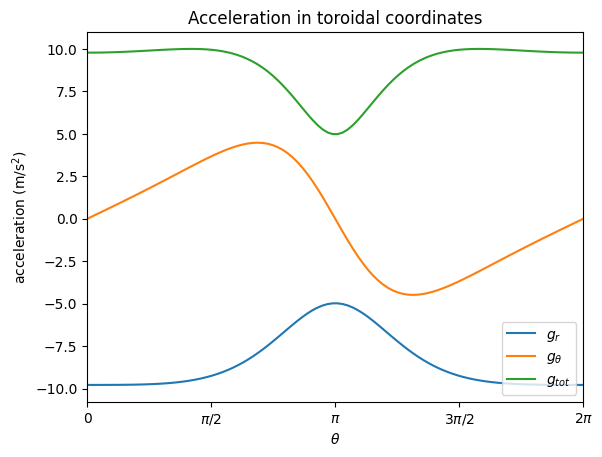

In [44]:
plt.plot(phi, g_t_r, label='$g_r$')
# plt.plot((phi+0.5*phi[1]-phi[0])[:-1], 0.5 * (g_t_r[1:] + g_t_r[:-1]), 'k.')

plt.plot(phi, g_t_phi, label=r'$g_{\theta}$')
plt.plot(phi, np.sqrt(np.square(g_t_r) + np.square(g_t_phi)), label="$g_{tot}$")
plt.legend(loc='lower right')
plt.xlabel(r'$\theta$')
plt.ylabel('acceleration (m/s$^2$)')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)
plt.title('Acceleration in toroidal coordinates')
plt.savefig('surface_gravity_toroidal.png', dpi=300)

In [45]:
g_tot = np.sqrt(np.square(g_t_r) + np.square(g_t_phi))
g_tot_max = np.max(g_tot)
max_index = np.where(g_tot == g_tot_max)
print("Maximum gravitational acceleration: ", g_tot_max, " at phi = ", phi[max_index]/np.pi, "pi")

Maximum gravitational acceleration:  9.995899523326722  at phi =  [1.57575758] pi


In [46]:
v_r = 0 * np.ones_like(phi)
v_phi = 0 * np.ones_like(phi)
v_theta = 10 * np.ones_like(phi)
ac_r, ac_phi, ac_theta = tp.toroidal_coriolis_acceleration(phi, v_r, v_phi, v_theta)

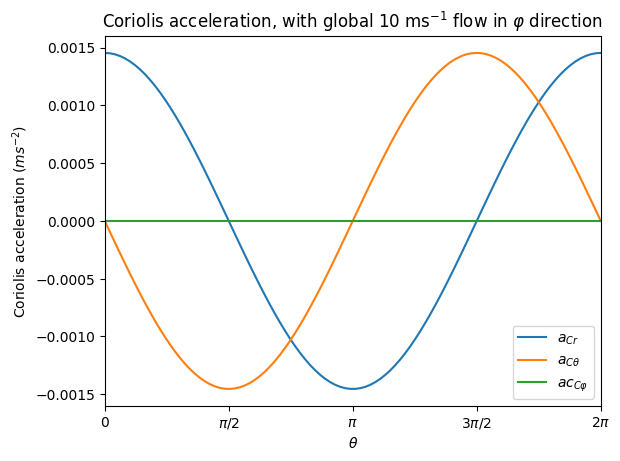

In [47]:
plt.plot(phi,ac_r, label=r'$a_{Cr}$')
plt.plot(phi,ac_phi, label=r'$a_{C\theta}$')
plt.plot(phi,ac_theta, label=r'$ac_{C\varphi}$')
plt.legend()
plt.xlabel(r'$\theta$')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)
plt.ylabel('Coriolis acceleration $(ms^{-2})$')
plt.title(r'Coriolis acceleration, with global 10 ms$^{-1}$ flow in $\varphi$ direction')
plt.savefig('coriolis.png', dpi=300)

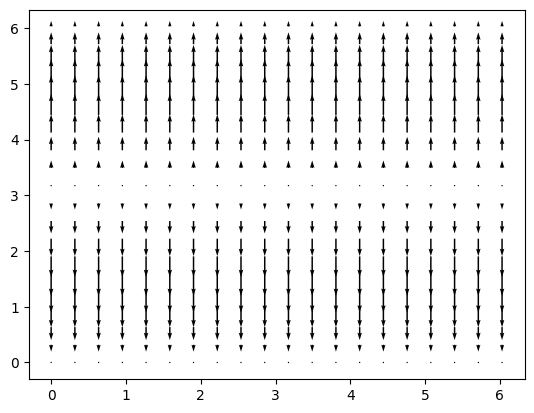

In [48]:
theta = np.linspace(0, 2 * np.pi, 100)
plt.quiver(theta[::5], phi[::5], np.tile(ac_theta,(len(theta),1)).T[::5,::5], np.tile(ac_phi,(len(theta),1)).T[::5,::5])

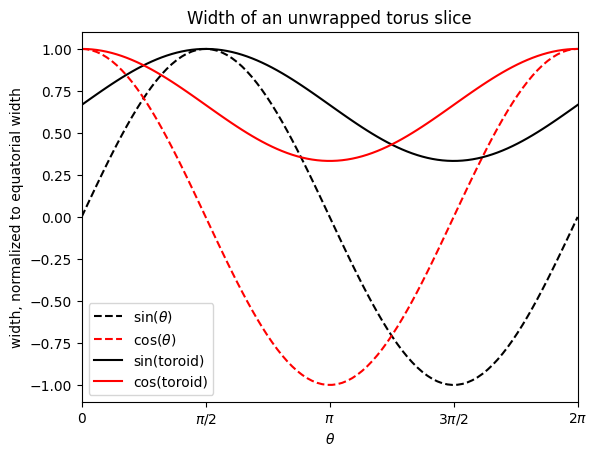

In [49]:
# shape of an unwrapped torus slice

slice_width = tp.toroidal_slice_width(theta, r_major, r_minor)
plt.plot(theta, np.sin(theta),'k--', label=r'sin($\theta$)')
plt.plot(theta, np.cos(theta),'r--', label=r'cos($\theta$)')
plt.plot(theta, (r_major + r_minor * np.sin(theta)) / (r_minor + r_major),'k-', label='sin(toroid)')
plt.plot(theta, (r_major + r_minor * np.cos(theta)) / (r_minor + r_major),'r-', label='cos(toroid)')
plt.ylabel('width, normalized to equatorial width')
plt.xlabel(r'$\theta$')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)
plt.title('Width of an unwrapped torus slice')
plt.legend()
plt.savefig('toroidal_slice_width.png', dpi=300)

(0.0, 6.283185307179586)

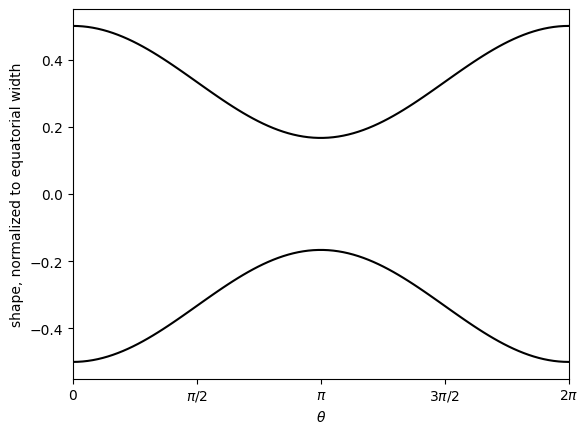

In [50]:
plt.plot(theta,slice_width/2,'k-')
plt.plot(theta,-slice_width/2,'k-')

plt.ylabel('shape, normalized to equatorial width')
plt.xlabel(r'$\theta$')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)

